In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset 1.csv')

## EDA And Feature Engineering

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
# drops irrelevant col
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# renames columns to increase readability
df.columns = ['Risky Borrower', # target
              'Revolving Utilization',
              'Age',
              '30-59 Days Late',
              'Debt Ratio',
              'Monthly Income',
              'Open Credit Lines And Loans',
              '90 Days Late',
              'Real Estate Loans',
              '60-89 Days Late',
              'Dependents']

[Text(0, 0, '139974'), Text(0, 0, '10026')]

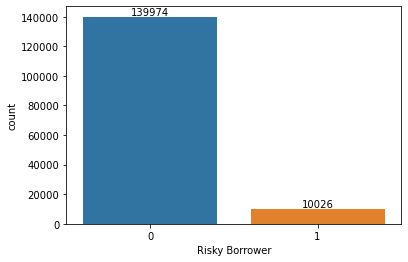

In [7]:
ax = sns.countplot(x = 'Risky Borrower', data = df)
ax.bar_label(ax.containers[0])

In [8]:
# funny mean (likely skewed due to super high max)
df['Revolving Utilization'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: Revolving Utilization, dtype: float64

In [9]:
# 3000 values where revol_util greater than 1 which doesn't make sense
df[df['Revolving Utilization'] > 1]

,Risky Borrower,Revolving Utilization,Age,30-59 Days Late,Debt Ratio,Monthly Income,Open Credit Lines And Loans,90 Days Late,Real Estate Loans,60-89 Days Late,Dependents
162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
191,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
226,1,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0
251,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
293,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149939,0,1.049900,26,0,0.073220,6500.0,6,0,0,1,0.0
149955,1,1.135552,41,2,0.845887,7500.0,12,0,4,1,0.0
149962,0,1.005733,48,0,0.248896,2944.0,4,3,0,0,1.0
149964,0,1.010934,63,0,0.608211,6015.0,8,0,1,0,0.0


In [10]:
# a lot of borrowers with weird revol_util have been classified as non-risky borrowers; suggests that weird values are typos
df[(df['Revolving Utilization'] > 1) & (df['Risky Borrower'] == 0)]

,Risky Borrower,Revolving Utilization,Age,30-59 Days Late,Debt Ratio,Monthly Income,Open Credit Lines And Loans,90 Days Late,Real Estate Loans,60-89 Days Late,Dependents
191,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
293,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
319,0,1.002647,38,2,0.472543,3550.0,8,1,0,1,4.0
369,0,1.047496,35,2,0.314566,3871.0,8,0,2,1,3.0
541,0,1.245847,24,1,499.000000,NaN,4,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149927,0,3.603566,71,0,0.054401,12370.0,5,0,0,0,1.0
149939,0,1.049900,26,0,0.073220,6500.0,6,0,0,1,0.0
149962,0,1.005733,48,0,0.248896,2944.0,4,3,0,0,1.0
149964,0,1.010934,63,0,0.608211,6015.0,8,0,1,0,0.0


In [11]:
# thesis: revol util vals greater than 1 and less than 100 are likely listed as percentages
# e.g. 25% instead of 0.25
# hence we will divide them by 100 to get their decimal score once again
df['Revolving Utilization'] = df['Revolving Utilization'].apply(lambda x: x/100 if x >= 1 and x < 100 else x)

In [12]:
# drop rows where revol_util greater than 100
df.drop(index = df[df['Revolving Utilization'] > 100].index, inplace = True)

In [13]:
# these values make more sense
df['Revolving Utilization'].describe()

count    149777.000000
mean          0.297692
std           0.336880
min           0.000000
25%           0.025178
50%           0.135982
75%           0.507695
max           1.000000
Name: Revolving Utilization, dtype: float64

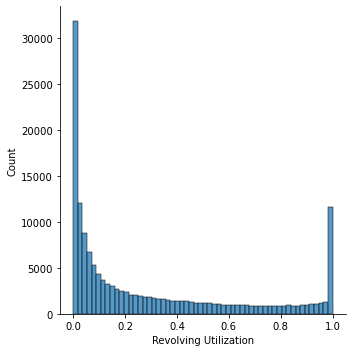

In [14]:
# sudden uptick near 1 because people may have maxed out their credit limits; overall, distribution makes sense
sns.displot(df['Revolving Utilization'])

In [15]:
df['Age'].describe()

count    149777.000000
mean         52.297749
std          14.771745
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: Age, dtype: float64

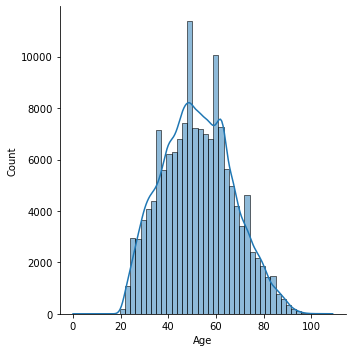

In [16]:
sns.displot(df['Age'], bins = 50, kde = True)

In [17]:
# there is one borrower under the age of 18; seems like a bad piece of data so we can drop it
df[df['Age'] < 18]

,Risky Borrower,Revolving Utilization,Age,30-59 Days Late,Debt Ratio,Monthly Income,Open Credit Lines And Loans,90 Days Late,Real Estate Loans,60-89 Days Late,Dependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [18]:
df.drop(index = 65695, inplace = True)

In [19]:
sum(df['Age'] > 80)

4929

In [20]:
df[(df['Age'] > 80) & (df['Risky Borrower'] == 1)]

,Risky Borrower,Revolving Utilization,Age,30-59 Days Late,Debt Ratio,Monthly Income,Open Credit Lines And Loans,90 Days Late,Real Estate Loans,60-89 Days Late,Dependents
572,1,0.339504,89,1,0.549380,2500.0,9,3,0,1,0.0
856,1,0.778719,81,0,0.538013,4287.0,11,0,2,0,0.0
4423,1,0.003952,87,0,269.000000,NaN,7,0,1,0,NaN
6070,1,0.000000,82,5,2146.000000,NaN,5,1,1,1,0.0
9492,1,0.004021,83,1,1368.000000,NaN,10,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
140023,1,0.000148,83,0,0.001371,2916.0,14,0,0,0,0.0
146007,1,0.365548,82,1,0.218297,6000.0,16,0,0,0,0.0
147593,1,0.010278,87,7,1.466540,7351.0,14,3,3,5,1.0
148365,1,1.000000,84,0,36.000000,NaN,0,0,0,0,0.0


In [21]:
# we can drop data points of people over the age of 80; data doesn't seem reliable and this isn't part of tagret demographic
df.drop(index = df[df['Age'] > 80].index, inplace = True)

In [22]:
df['Dependents'].describe()

count    141472.000000
mean          0.777624
std           1.124833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: Dependents, dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

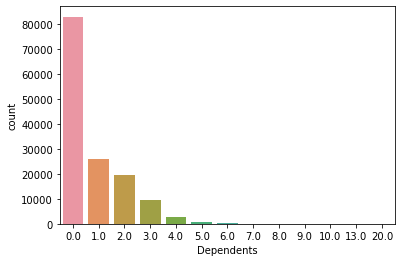

In [23]:
sns.countplot(x = 'Dependents', data = df)

In [24]:
# beyond scope
df.drop(index = df[df['Dependents'] > 6].index, inplace = True)

In [25]:
df['Monthly Income'].describe()

count    1.169190e+05
mean     6.701208e+03
std      1.443360e+04
min      0.000000e+00
25%      3.416000e+03
50%      5.416000e+03
75%      8.300000e+03
max      3.008750e+06
Name: Monthly Income, dtype: float64

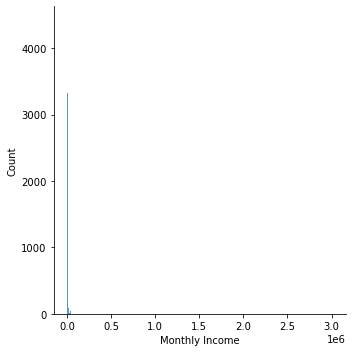

In [26]:
# very few values, very far from mean (i.e. very skewed max)
sns.displot(df['Monthly Income'])

In [27]:
# people with monthly incomes greater than 30,000 will be beyond the scope of this model
sum(df['Monthly Income'] > 30000)
df.drop(index = df[df['Monthly Income'] > 30000].index, inplace = True)

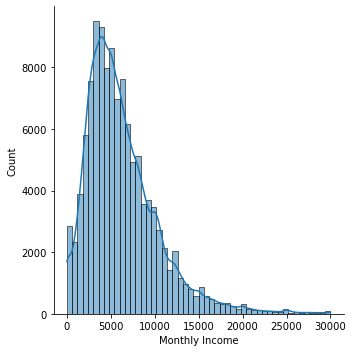

In [28]:
sns.displot(df['Monthly Income'], bins = 50, kde = True)

In [29]:
df.isnull().sum()

Risky Borrower                     0
Revolving Utilization              0
Age                                0
30-59 Days Late                    0
Debt Ratio                         0
Monthly Income                 27841
Open Credit Lines And Loans        0
90 Days Late                       0
Real Estate Loans                  0
60-89 Days Late                    0
Dependents                      3375
dtype: int64

In [30]:
df.drop(index = df[df['Monthly Income'].isnull()].index, inplace = True)

In [31]:
# skewed max
df['Debt Ratio'].describe()

count    116144.000000
mean         26.563425
std         387.333171
min           0.000000
25%           0.152383
50%           0.302428
75%           0.488636
max       60212.000000
Name: Debt Ratio, dtype: float64

In [32]:
# identifying where exactly outlier values are

print('Debt Ratio > 1        ---  ', sum(df['Debt Ratio'] > 1))
print('Debt Ratio > 100      ---  ', sum(df['Debt Ratio'] > 100))
print()
print('1 < Debt Ratio < 100  ---  ', sum((df['Debt Ratio'] > 1) & (df['Debt Ratio'] < 100)))
print('1 < Debt Ratio < 10   ---  ', sum((df['Debt Ratio'] > 1) & (df['Debt Ratio'] < 10)))
print('1 < Debt Ratio < 5    ---  ', sum((df['Debt Ratio'] > 1) & (df['Debt Ratio'] < 5)))
print('1 < Debt Ratio < 3    ---  ', sum((df['Debt Ratio'] > 1) & (df['Debt Ratio'] < 3)))

Debt Ratio > 1        ---   7106
Debt Ratio > 100      ---   1661

1 < Debt Ratio < 100  ---   5443
1 < Debt Ratio < 10   ---   5042
1 < Debt Ratio < 5    ---   4804
1 < Debt Ratio < 3    ---   4472


In [33]:
df[(df['Debt Ratio'] > 1) & (df['Debt Ratio'] < 10)]['Debt Ratio']

25        1.595253
63        1.051398
79        2.797699
82        2.604511
111       1.382629
            ...   
149807    1.059708
149808    1.055178
149823    2.094595
149841    1.061506
149907    1.124589
Name: Debt Ratio, Length: 5042, dtype: float64

In [34]:
# divide dti that fall under above category by 10
df['Debt Ratio'] = df['Debt Ratio'].apply(lambda x: x / 10 if x > 1 and x < 10 else x)

In [35]:
# incomes are extremely low for people with debt ratio greater than 10; indicates that these are bad datapoints
df[df['Debt Ratio'] > 10]['Monthly Income'].describe()

count     2055.000000
mean       120.395134
std        974.018737
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      16500.000000
Name: Monthly Income, dtype: float64

In [36]:
df.drop(index = df[df['Debt Ratio'] >= 10].index, inplace = True)

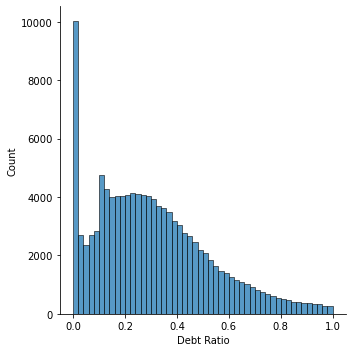

In [37]:
sns.displot(df['Debt Ratio'], bins = 50)

In [38]:
df['Open Credit Lines And Loans'].describe()

count    114080.000000
mean          8.784721
std           5.164261
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: Open Credit Lines And Loans, dtype: float64

In [39]:
df['Open Credit Lines And Loans'].value_counts().head(5)

6    10227
7    10200
8     9844
5     9524
9     8996
Name: Open Credit Lines And Loans, dtype: int64

In [40]:
# beyond scope
df.drop(index = df[(df['Open Credit Lines And Loans'] > 20)].index, inplace = True)

In [41]:
df['Real Estate Loans'].describe()

count    110800.000000
mean          1.033475
std           1.054421
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          13.000000
Name: Real Estate Loans, dtype: float64

In [42]:
df['Real Estate Loans'].value_counts().head()

0    39819
1    39122
2    24566
3     4789
4     1598
Name: Real Estate Loans, dtype: int64

In [43]:
# beyond scope
df.drop(index = df[df['Real Estate Loans'] > 5].index, inplace = True)

In [44]:
# dropping outlier delinquency vals
df.drop(index = df[df['30-59 Days Late'] > 60].index, inplace = True)
df.drop(index = df[df['60-89 Days Late'] > 60].index, inplace = True)
df.drop(index = df[df['90 Days Late'] > 60].index, inplace = True)

In [45]:
df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

<AxesSubplot:>

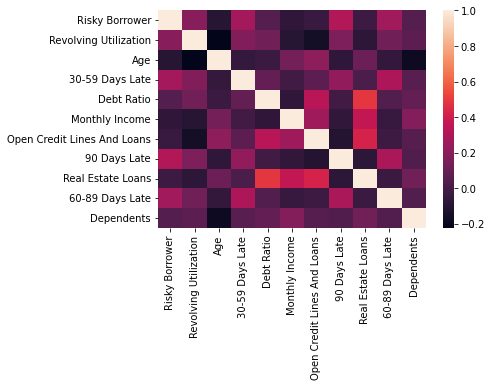

In [46]:
sns.heatmap(df.corr())

[Text(0, 0, '102473'), Text(0, 0, '7735')]

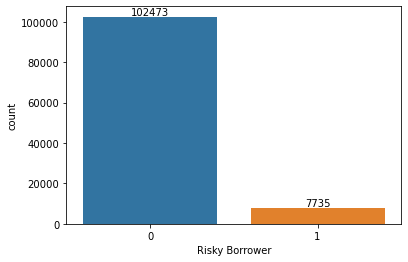

In [47]:
ax = sns.countplot(x = 'Risky Borrower', data = df)
ax.bar_label(ax.containers[0])

In [64]:
# dataset is skewed; too many 0 vals relative to 1 vals

sub1 = df[df['Risky Borrower'] == 0].sample(n = 10000)
sub2 = df[df['Risky Borrower'] == 1]
sample = pd.concat([sub1, sub2])
sample.reset_index(inplace = True)
sample.drop('index', axis = 1, inplace = True)

In [65]:
sample.head()

,Risky Borrower,Revolving Utilization,Age,30-59 Days Late,Debt Ratio,Monthly Income,Open Credit Lines And Loans,90 Days Late,Real Estate Loans,60-89 Days Late,Dependents
0,0,0.236476,74,0,0.152656,8207.0,8,0,1,0,0.0
1,0,0.358540,66,0,0.665454,6046.0,7,0,2,0,0.0
2,0,0.021111,65,0,0.159051,800.0,8,0,1,0,0.0
3,0,0.000000,38,0,0.155077,4500.0,11,0,0,0,1.0
4,0,0.067672,52,0,0.169566,5000.0,8,0,2,0,0.0


In [66]:
scaler = MinMaxScaler()

In [68]:
scaled_features = scaler.fit_transform(sample.drop('Risky Borrower', axis = 1))

## Model

In [69]:
X = scaled_features
y = sample['Risky Borrower'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
model = LogisticRegression()

In [72]:
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
pred = model.predict(X_test)

In [74]:
print(confusion_matrix(pred, y_test))

[[2566  922]
 [ 397 1436]]


In [75]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      3488
           1       0.61      0.78      0.69      1833

    accuracy                           0.75      5321
   macro avg       0.74      0.76      0.74      5321
weighted avg       0.78      0.75      0.76      5321



In [81]:
sample.drop('Risky Borrower', axis = 1).columns

Index(['Revolving Utilization', 'Age', '30-59 Days Late', 'Debt Ratio',
       'Monthly Income', 'Open Credit Lines And Loans', '90 Days Late',
       'Real Estate Loans', '60-89 Days Late', 'Dependents'],
      dtype='object')

In [77]:
model.coef_

array([[ 1.44199559, -1.15171588,  8.27256345,  0.27278415, -1.35449547,
         0.23838032, 11.36689583,  0.3560153 ,  7.34071696,  0.32359964]])

In [59]:
model = RandomForestClassifier()

In [60]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
pred = model.predict(X_test)

In [62]:
print(confusion_matrix(pred, y_test))

[[1814  608]
 [ 492 1727]]


In [63]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2422
           1       0.74      0.78      0.76      2219

    accuracy                           0.76      4641
   macro avg       0.76      0.76      0.76      4641
weighted avg       0.76      0.76      0.76      4641



## Extended Analysis

In [80]:
prob = []
total = 0
for x in model.predict_proba(X_test):
    for y in x:
        total += 1
        if total % 2 == 0:
            prob.append(y)

In [83]:
new_pred = []
for val in prob:
    if val > 0.6:
        new_pred.append(1)
    elif val < 0.4:
        new_pred.append(0)
    else:
        new_pred.append('Unclear')

In [84]:
unclear = []
for x in range(len(new_pred)):
    if new_pred[x] == 'Unclear':
        unclear.append(x)

In [85]:
y_test = list(y_test)
for x in unclear:
    y_test[x] = 'Unclear'

In [86]:
y_test.count('Unclear')

795

In [87]:
while 'Unclear' in y_test:
    y_test.remove('Unclear')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [88]:
while 'Unclear' in new_pred:
    new_pred.remove('Unclear')

In [89]:
print(classification_report(new_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1997
           1       0.78      0.81      0.79      1849

    accuracy                           0.80      3846
   macro avg       0.80      0.80      0.80      3846
weighted avg       0.80      0.80      0.80      3846

